In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [17]:
path = r'C:\Users\Jchukwuedozi\Documents\data science'

In [18]:
df = pd.read_csv(os.path.join(path, 'data.csv'))

In [19]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [20]:
df = df[['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value', 'Wage', 'Position']]

In [21]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Position
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,RF
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,ST
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,LW
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,GK
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,RCM


In [22]:
def conversion(x):
    if 'M' in x:
        return pd.to_numeric(x.replace('€', '').replace('M', ''))*1_000_000
    else:
        return pd.to_numeric(x.replace('€', '').replace('K', ''))*1_000

In [23]:
df['Value'] = df['Value'].apply(lambda x: conversion(x))

In [24]:
df['Wage'] = df['Wage'].apply(lambda x: conversion(x))

In [25]:
df.tail()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Position
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,60000.0,1000,CM
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60000.0,1000,ST
18204,241638,B. Worman,16,England,47,67,Cambridge United,60000.0,1000,ST
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60000.0,1000,RW
18206,246269,G. Nugent,16,England,46,66,Tranmere Rovers,60000.0,1000,CM


### How many players in the game are from a particular country

In [26]:
df.groupby('Nationality').count()

,ID,Name,Age,Overall,Potential,Club,Value,Wage,Position
Nationality,,,,,,,,,
Afghanistan,4,4,4,4,4,4,4,4,4
Albania,40,40,40,40,40,40,40,40,39
Algeria,60,60,60,60,60,60,60,60,60
Andorra,1,1,1,1,1,1,1,1,1
Angola,15,15,15,15,15,15,15,15,15
...,...,...,...,...,...,...,...,...,...
Uzbekistan,2,2,2,2,2,2,2,2,2
Venezuela,67,67,67,67,67,60,67,67,66
Wales,129,129,129,129,129,128,129,129,129


In [27]:
grouped = df.groupby('Nationality').filter(lambda x: x['Name'].count() > 100).groupby('Nationality').count()

In [28]:
x = grouped['Name'].index
y = grouped['Name'].values

Text(0, 0.5, 'Number of Players')

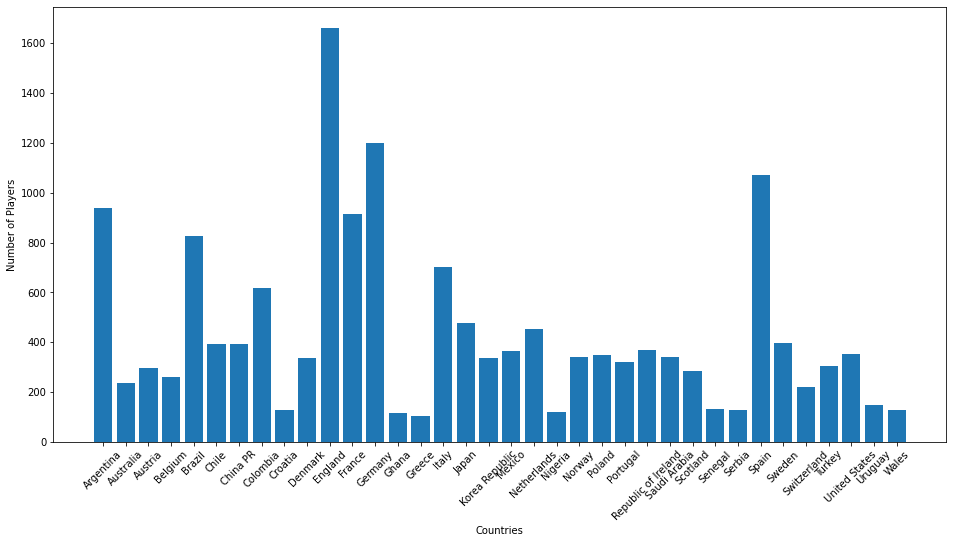

In [29]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.bar(x, y)
plt.setp(ax.get_xticklabels(), visible=True, rotation=45)
ax.set_xlabel('Countries')
ax.set_ylabel('Number of Players')

In [30]:
All = df.groupby('Nationality').count()

In [31]:
x = All['Name'].index
y = All['Name'].values

Text(0, 0.5, 'Number of Players')

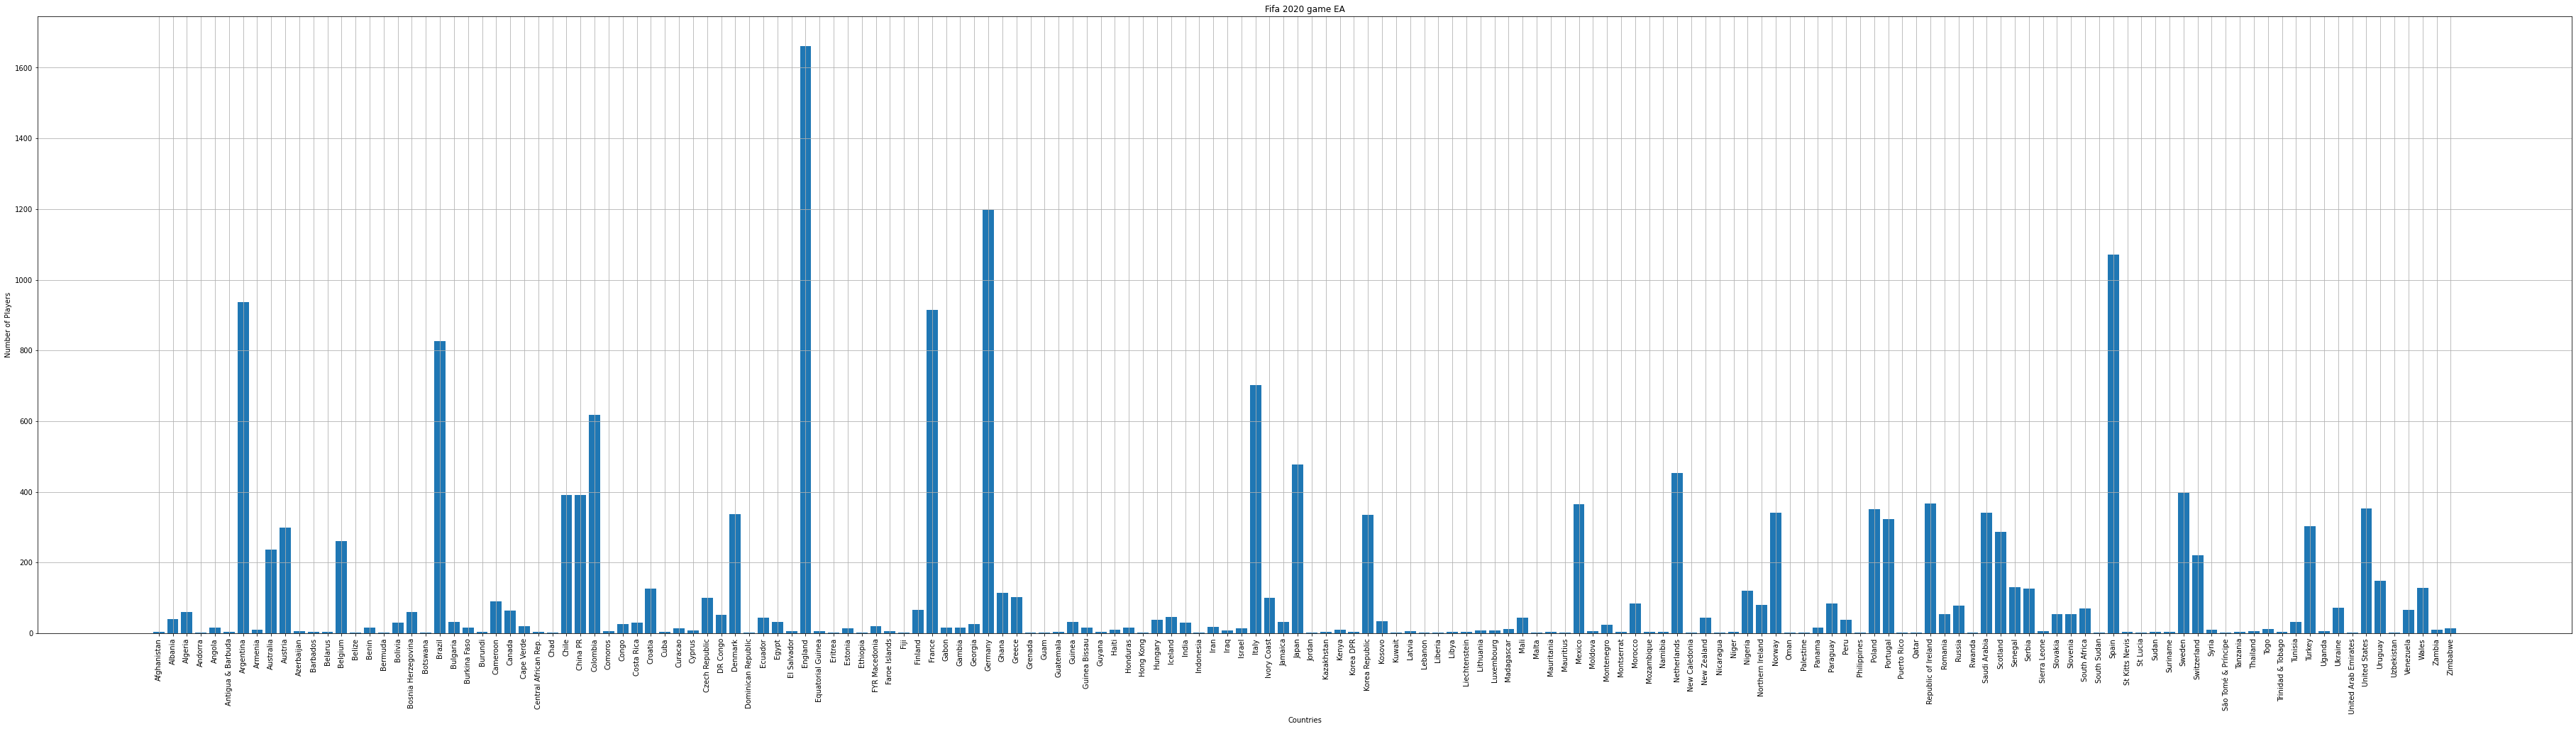

In [32]:
fig, ax = plt.subplots(figsize=(64, 16))
ax.bar(x, y)
plt.setp(ax.get_xticklabels(), visible=True, rotation=90)
ax.title.set_text('Fifa 2020 game EA')
ax.grid()
ax.set_xlabel('Countries')
ax.set_ylabel('Number of Players')

### How much wage do players from a particular country receive

In [33]:
wage_comparison = df.groupby('Nationality').sum()['Wage']

In [34]:
countries = wage_comparison.index
amount_received = wage_comparison.values

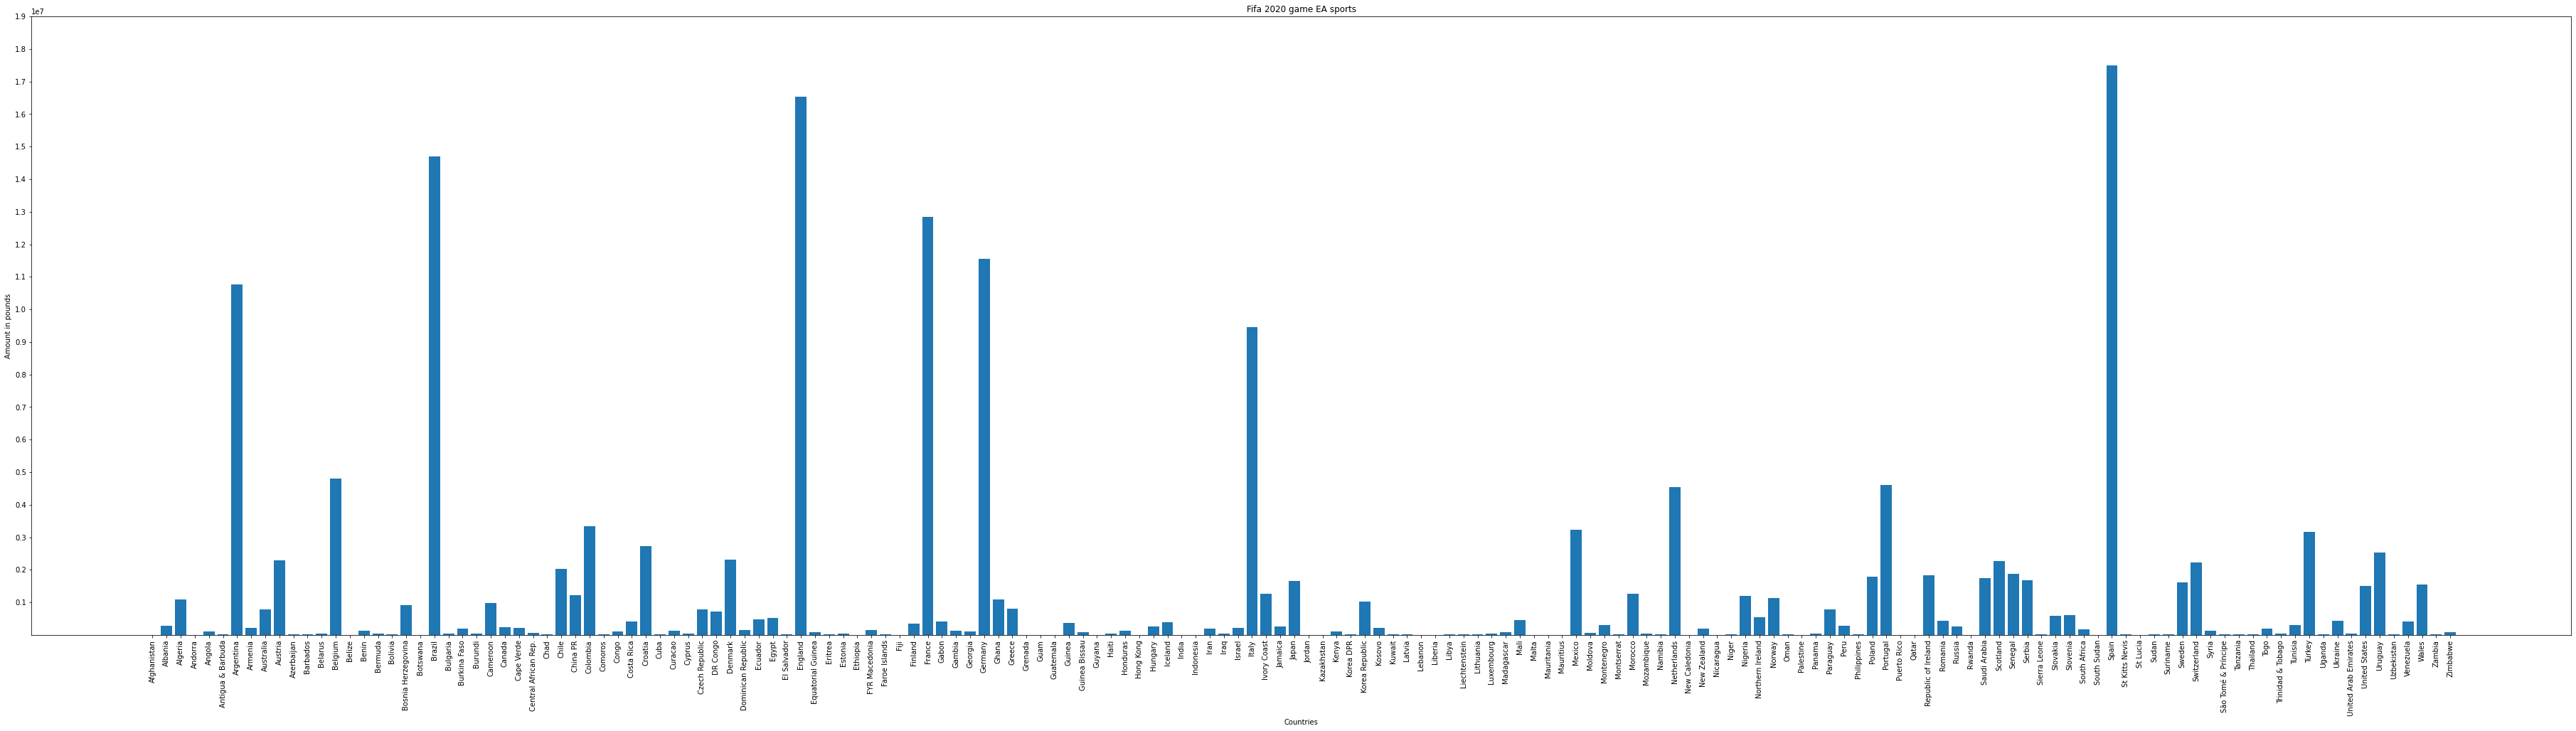

In [35]:
fig, ax = plt.subplots(figsize=(64, 16))
ax.bar(countries, amount_received)
ax.set_xlabel('Countries')
ax.set_ylabel('Amount in pounds')
ax.set_yticks(np.arange(1_000_000, 20_000_000, 1_000_000))
plt.setp(ax.get_xticklabels(), visible=True, rotation=90)
ax.title.set_text('Fifa 2020 game EA sports')
plt.show()

In [36]:
wage_comparison_filtered = df.groupby('Nationality').filter(lambda x: x['Wage'].sum() > 1_000_000).groupby('Nationality').sum()['Wage']

In [37]:
countries = wage_comparison_filtered.index
amount_received = wage_comparison_filtered.values

In [38]:
amount_received

array([ 1085000, 10778000,  2285000,  4805000, 14703000,  2024000,
        1225000,  3347000,  2732000,  2323000, 16526000, 12845000,
       11548000,  1096000,  9462000,  1271000,  1651000,  1027000,
        3230000,  1262000,  4546000,  1193000,  1139000,  1796000,
        4608000,  1835000,  1740000,  2281000,  1867000,  1689000,
       17498000,  1618000,  2234000,  3164000,  1503000,  2534000,
        1560000], dtype=int64)

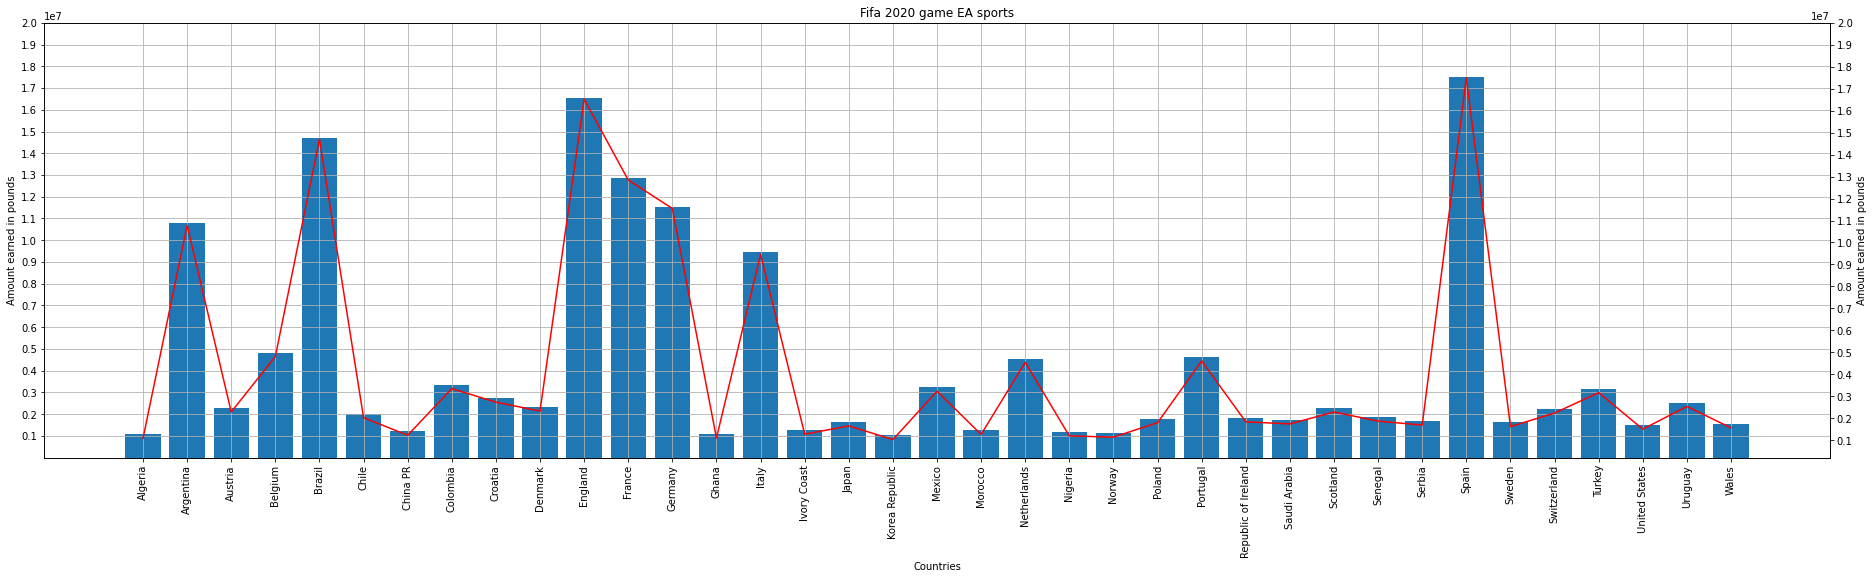

In [39]:
fig, ax = plt.subplots(figsize=(32, 8))
ax.bar(countries, amount_received)
ax2 = ax.twinx()
ax.set_xlabel('Countries')
ax.set_ylabel('Amount earned in pounds')
ax.title.set_text('Fifa 2020 game EA sports')
ax.grid()
ax.set_yticks(range(1_000_000, 21_000_000, 1_000_000))
plt.setp(ax.get_xticklabels(), visible=True, rotation=90)
ax2.plot(countries, amount_received, 'r')
ax2.set_yticks(range(1_000_000, 21_000_000, 1_000_000))
ax2.set_ylabel('Amount earned in pounds')
plt.show()

In [40]:
df.head(10)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Position
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000,RF
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000,ST
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000,LW
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000,GK
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000,RCM
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000,LF
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000,RCM
7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,80000000.0,455000,RS
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000,RCB
9,200389,J. Oblak,25,Slovenia,90,93,Atlético Madrid,68000000.0,94000,GK


In [41]:
def get_class(x):
    if x > 250_000:
        return 'Top class'
    elif x > 100_000 and x < 250_000:
        return 'Mid class'
    else:
        return 'Low class'

In [42]:
df['Wage_category'] = df['Wage'].apply(lambda x: get_class(x))

In [43]:
df.tail()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Position,Wage_category
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,60000.0,1000,CM,Low class
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60000.0,1000,ST,Low class
18204,241638,B. Worman,16,England,47,67,Cambridge United,60000.0,1000,ST,Low class
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60000.0,1000,RW,Low class
18206,246269,G. Nugent,16,England,46,66,Tranmere Rovers,60000.0,1000,CM,Low class


In [44]:
def grade(x):
    if x >=70:
        return 'Grade A'
    elif x >=60 and x < 70:
        return 'Grade B'
    elif x >= 50 and x < 60:
        return 'Grade C'
    else:
        return 'Grade D'

In [45]:
df['Overall_grade'] = df['Overall'].apply(lambda x: grade(x))

In [46]:
df = df[['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Overall_grade', 'Potential', 'Club', 'Value', 'Wage', 'Wage_category', 'Position']]

In [47]:
df.head()

,ID,Name,Age,Nationality,Overall,Overall_grade,Potential,Club,Value,Wage,Wage_category,Position
0,158023,L. Messi,31,Argentina,94,Grade A,94,FC Barcelona,110500000.0,565000,Top class,RF
1,20801,Cristiano Ronaldo,33,Portugal,94,Grade A,94,Juventus,77000000.0,405000,Top class,ST
2,190871,Neymar Jr,26,Brazil,92,Grade A,93,Paris Saint-Germain,118500000.0,290000,Top class,LW
3,193080,De Gea,27,Spain,91,Grade A,93,Manchester United,72000000.0,260000,Top class,GK
4,192985,K. De Bruyne,27,Belgium,91,Grade A,92,Manchester City,102000000.0,355000,Top class,RCM


### Which category of players dominate the game

In [48]:
pie = df.groupby('Overall_grade').count()['ID']

In [49]:
pie.index

Index(['Grade A', 'Grade B', 'Grade C', 'Grade D'], dtype='object', name='Overall_grade')

In [50]:
pie.values

array([5638, 9665, 2815,   89], dtype=int64)

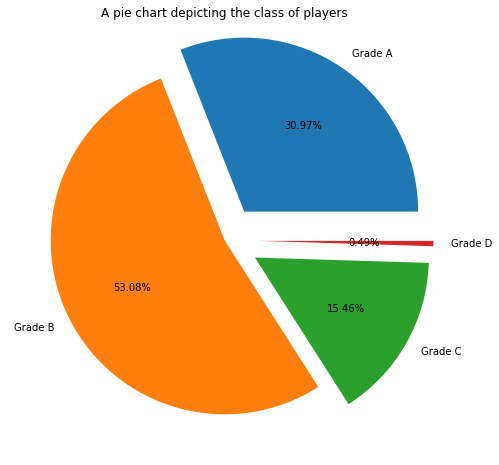

In [137]:
fig, ax = plt.subplots(figsize=(16, 8))
explode = [0.2, 0, 0.2, 0.2]
ax.pie(pie.values, labels=pie.index, explode = explode, autopct='%.2f%%')
ax.set_title('A pie chart depicting the class of players')
plt.show()

### Amount spent on wages by clubs

In [52]:
df.head()

,ID,Name,Age,Nationality,Overall,Overall_grade,Potential,Club,Value,Wage,Wage_category,Position
0,158023,L. Messi,31,Argentina,94,Grade A,94,FC Barcelona,110500000.0,565000,Top class,RF
1,20801,Cristiano Ronaldo,33,Portugal,94,Grade A,94,Juventus,77000000.0,405000,Top class,ST
2,190871,Neymar Jr,26,Brazil,92,Grade A,93,Paris Saint-Germain,118500000.0,290000,Top class,LW
3,193080,De Gea,27,Spain,91,Grade A,93,Manchester United,72000000.0,260000,Top class,GK
4,192985,K. De Bruyne,27,Belgium,91,Grade A,92,Manchester City,102000000.0,355000,Top class,RCM


In [53]:
club_cost = df.groupby('Club').sum()['Wage']

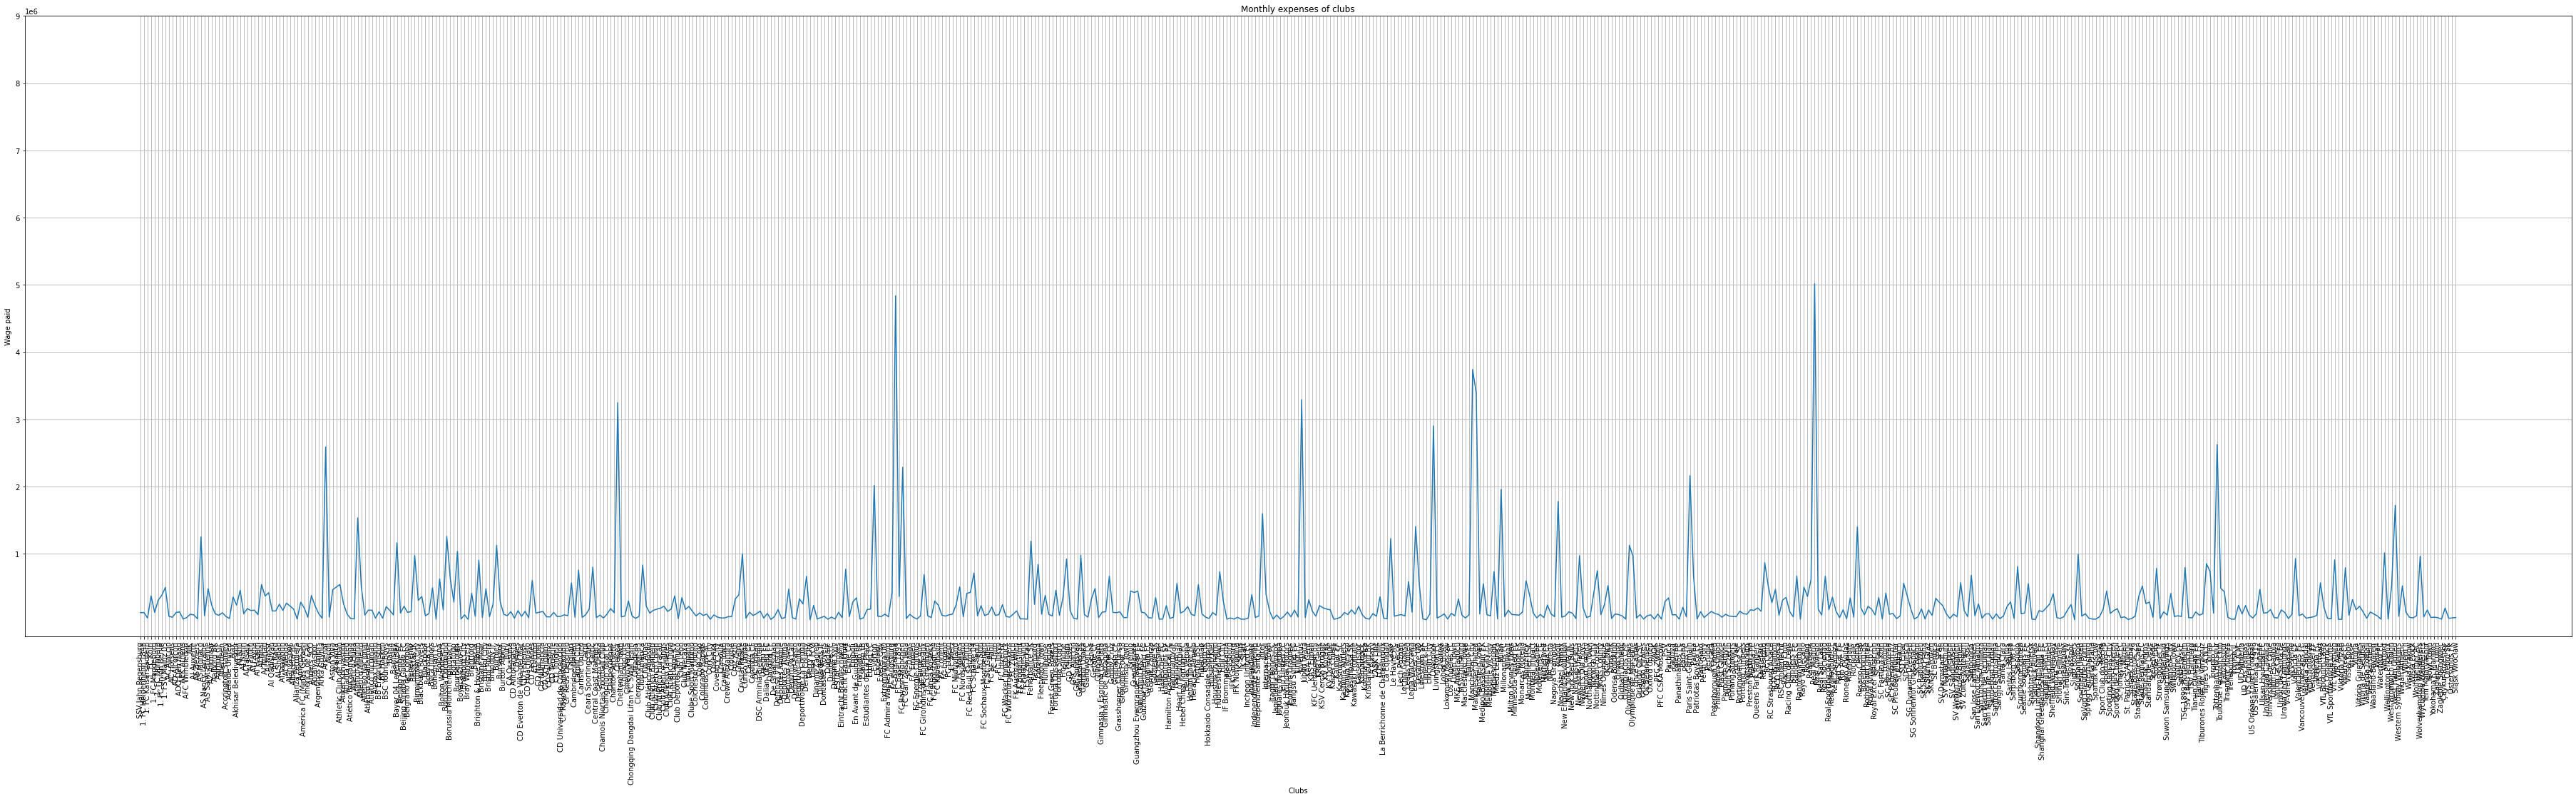

In [54]:
fig, ax = plt.subplots(figsize=(64, 16))
ax.plot(club_cost.index, club_cost.values)
ax.set_title('Monthly expenses of clubs')
ax.set_xlabel('Clubs')
ax.set_ylabel('Wage paid')
ax.grid()
ax.set_yticks(range(1_000_000, 10_000_000, 1_000_000))
plt.setp(ax.get_xticklabels(), visible=True, rotation=90)
plt.show()

### Draw a chart showing players who go out of their country to play

In [55]:
df.head()

,ID,Name,Age,Nationality,Overall,Overall_grade,Potential,Club,Value,Wage,Wage_category,Position
0,158023,L. Messi,31,Argentina,94,Grade A,94,FC Barcelona,110500000.0,565000,Top class,RF
1,20801,Cristiano Ronaldo,33,Portugal,94,Grade A,94,Juventus,77000000.0,405000,Top class,ST
2,190871,Neymar Jr,26,Brazil,92,Grade A,93,Paris Saint-Germain,118500000.0,290000,Top class,LW
3,193080,De Gea,27,Spain,91,Grade A,93,Manchester United,72000000.0,260000,Top class,GK
4,192985,K. De Bruyne,27,Belgium,91,Grade A,92,Manchester City,102000000.0,355000,Top class,RCM


### Number of people with good potential rating

In [56]:
df.head()

,ID,Name,Age,Nationality,Overall,Overall_grade,Potential,Club,Value,Wage,Wage_category,Position
0,158023,L. Messi,31,Argentina,94,Grade A,94,FC Barcelona,110500000.0,565000,Top class,RF
1,20801,Cristiano Ronaldo,33,Portugal,94,Grade A,94,Juventus,77000000.0,405000,Top class,ST
2,190871,Neymar Jr,26,Brazil,92,Grade A,93,Paris Saint-Germain,118500000.0,290000,Top class,LW
3,193080,De Gea,27,Spain,91,Grade A,93,Manchester United,72000000.0,260000,Top class,GK
4,192985,K. De Bruyne,27,Belgium,91,Grade A,92,Manchester City,102000000.0,355000,Top class,RCM


In [57]:
df['Potential_grade'] = df['Potential'].apply(lambda x: grade(x))

In [58]:
df = df[['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Overall_grade', 'Potential', 'Potential_grade', 'Club', 'Value', 'Wage', 'Wage_category', 'Position']]

In [59]:
df.head()

,ID,Name,Age,Nationality,Overall,Overall_grade,Potential,Potential_grade,Club,Value,Wage,Wage_category,Position
0,158023,L. Messi,31,Argentina,94,Grade A,94,Grade A,FC Barcelona,110500000.0,565000,Top class,RF
1,20801,Cristiano Ronaldo,33,Portugal,94,Grade A,94,Grade A,Juventus,77000000.0,405000,Top class,ST
2,190871,Neymar Jr,26,Brazil,92,Grade A,93,Grade A,Paris Saint-Germain,118500000.0,290000,Top class,LW
3,193080,De Gea,27,Spain,91,Grade A,93,Grade A,Manchester United,72000000.0,260000,Top class,GK
4,192985,K. De Bruyne,27,Belgium,91,Grade A,92,Grade A,Manchester City,102000000.0,355000,Top class,RCM


In [167]:
df.tail()

,ID,Name,Age,Nationality,Overall,Overall_grade,Potential,Potential_grade,Club,Value,Wage,Wage_category,Position
18202,238813,J. Lundstram,19,England,47,Grade D,65,Grade B,Crewe Alexandra,60000.0,1000,Low class,CM
18203,243165,N. Christoffersson,19,Sweden,47,Grade D,63,Grade B,Trelleborgs FF,60000.0,1000,Low class,ST
18204,241638,B. Worman,16,England,47,Grade D,67,Grade B,Cambridge United,60000.0,1000,Low class,ST
18205,246268,D. Walker-Rice,17,England,47,Grade D,66,Grade B,Tranmere Rovers,60000.0,1000,Low class,RW
18206,246269,G. Nugent,16,England,46,Grade D,66,Grade B,Tranmere Rovers,60000.0,1000,Low class,CM


In [60]:
potential_grade = df.groupby('Potential_grade').count()['ID']

In [61]:
potential_grade

Potential_grade
Grade A    10807
Grade B     7070
Grade C      328
Grade D        2
Name: ID, dtype: int64

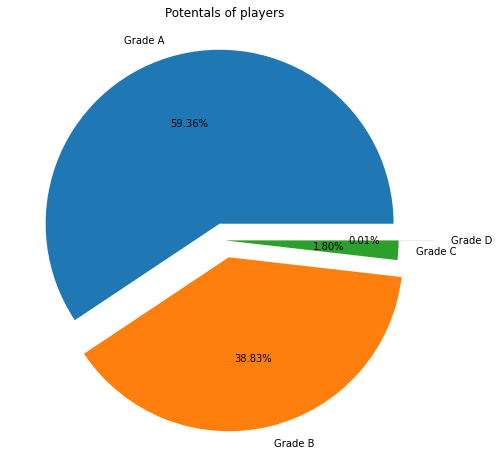

In [143]:
fig, ax = plt.subplots(figsize=(16,8))
explode = [0.1, 0.1, 0, 0.2]
ax.pie(potential_grade.values, labels=potential_grade.index, explode=explode, autopct='%.2f%%')
ax.set_title('Potentals of players')
plt.show()

### Countries that produce such players

In [63]:
df.head()

,ID,Name,Age,Nationality,Overall,Overall_grade,Potential,Potential_grade,Club,Value,Wage,Wage_category,Position
0,158023,L. Messi,31,Argentina,94,Grade A,94,Grade A,FC Barcelona,110500000.0,565000,Top class,RF
1,20801,Cristiano Ronaldo,33,Portugal,94,Grade A,94,Grade A,Juventus,77000000.0,405000,Top class,ST
2,190871,Neymar Jr,26,Brazil,92,Grade A,93,Grade A,Paris Saint-Germain,118500000.0,290000,Top class,LW
3,193080,De Gea,27,Spain,91,Grade A,93,Grade A,Manchester United,72000000.0,260000,Top class,GK
4,192985,K. De Bruyne,27,Belgium,91,Grade A,92,Grade A,Manchester City,102000000.0,355000,Top class,RCM


In [97]:
country_potentials = df.groupby(['Nationality', 'Potential_grade']).count()['Potential']

In [100]:
country_index_reset = country_potentials.reset_index()

In [101]:
country_index_reset

,Nationality,Potential_grade,Potential
0,Afghanistan,Grade A,2
1,Afghanistan,Grade B,2
2,Albania,Grade A,27
3,Albania,Grade B,13
4,Algeria,Grade A,41
...,...,...,...
335,Wales,Grade C,3
336,Zambia,Grade A,7
337,Zambia,Grade B,2
338,Zimbabwe,Grade A,11


In [89]:
country_pivoted_potentials = index_reset.pivot_table(index='Nationality', columns='Potential_grade', values='Potential')

In [90]:
country_pivoted_potentials

Potential_grade,Grade A,Grade B,Grade C,Grade D
Nationality,,,,
Afghanistan,2.0,2.0,NaN,NaN
Albania,27.0,13.0,NaN,NaN
Algeria,41.0,19.0,NaN,NaN
Andorra,NaN,1.0,NaN,NaN
Angola,9.0,6.0,NaN,NaN
...,...,...,...,...
Uzbekistan,1.0,1.0,NaN,NaN
Venezuela,51.0,14.0,2.0,NaN
Wales,59.0,67.0,3.0,NaN


### Clubs with such players

In [102]:
club_potentials = df.groupby(['Club', 'Potential_grade']).count()['Potential']

In [103]:
club_potentials

Club                   Potential_grade
 SSV Jahn Regensburg   Grade A            17
                       Grade B            12
1. FC Heidenheim 1846  Grade A            21
                       Grade B             7
1. FC Kaiserslautern   Grade A            13
                                          ..
Östersunds FK          Grade B             8
                       Grade C             1
Śląsk Wrocław          Grade A             4
                       Grade B            17
                       Grade C             4
Name: Potential, Length: 1397, dtype: int64

In [104]:
club_index_reset = club_potentials.reset_index()

In [105]:
club_index_reset

,Club,Potential_grade,Potential
0,SSV Jahn Regensburg,Grade A,17
1,SSV Jahn Regensburg,Grade B,12
2,1. FC Heidenheim 1846,Grade A,21
3,1. FC Heidenheim 1846,Grade B,7
4,1. FC Kaiserslautern,Grade A,13
...,...,...,...
1392,Östersunds FK,Grade B,8
1393,Östersunds FK,Grade C,1
1394,Śląsk Wrocław,Grade A,4
1395,Śląsk Wrocław,Grade B,17


In [106]:
club_pivoted_potentials = club_index_reset.pivot_table(index='Club', columns='Potential_grade', values='Potential')

In [108]:
club_pivoted_potentials

Potential_grade,Grade A,Grade B,Grade C,Grade D
Club,,,,
SSV Jahn Regensburg,17.0,12.0,NaN,NaN
1. FC Heidenheim 1846,21.0,7.0,NaN,NaN
1. FC Kaiserslautern,13.0,13.0,NaN,NaN
1. FC Köln,27.0,1.0,NaN,NaN
1. FC Magdeburg,14.0,12.0,NaN,NaN
...,...,...,...,...
Zagłębie Sosnowiec,1.0,23.0,1.0,NaN
Çaykur Rizespor,20.0,10.0,NaN,NaN
Örebro SK,7.0,20.0,NaN,NaN
